<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/symmetric_CE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imblearn

In [2]:
!pip install seaborn

In [3]:
!pip install -U tensorflow scikeras imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is inc

In [4]:
!pip install scikeras

In [5]:
!pip install -U scikit-learn scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 67.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


In [7]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [8]:
TRAIN_PATH = "/content/drive/MyDrive/datasets/ECG/mitbih_train.csv"
TEST_PATH  = "/content/drive/MyDrive/datasets/ECG/mitbih_test.csv"

train = pd.read_csv(TRAIN_PATH, header=None)
test  = pd.read_csv(TEST_PATH, header=None)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


In [9]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]


In [10]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [11]:
y_res_cat  = to_categorical(y_res, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)


In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X_res, y_res_cat, test_size=0.2, random_state=0
)


In [13]:
def symmetric_cross_entropy(y_true, y_pred, alpha=0.5, beta=0.5):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0)

    ce = -tf.reduce_mean(
        tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1)
    )

    rce = -tf.reduce_mean(
        tf.reduce_sum(y_pred * tf.math.log(y_true + 1e-7), axis=1)
    )

    return alpha * ce + beta * rce


In [14]:
def ann_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(64, activation="relu"),
        Dense(5, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss=symmetric_cross_entropy,
        metrics=["accuracy"]
    )

    return model


In [15]:
model = ann_model()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8256 - loss: 1.9648 - val_accuracy: 0.9313 - val_loss: 0.7709
Epoch 2/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9431 - loss: 0.6617 - val_accuracy: 0.9610 - val_loss: 0.4585
Epoch 3/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9613 - loss: 0.4528 - val_accuracy: 0.9649 - val_loss: 0.4115
Epoch 4/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9705 - loss: 0.3486 - val_accuracy: 0.9684 - val_loss: 0.3619
Epoch 5/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9736 - loss: 0.3113 - val_accuracy: 0.9728 - val_loss: 0.3156
Epoch 6/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9777 - loss: 0.2640 - val_accuracy: 0.9794 - val_loss: 0.2393
Epoch 7/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9801 - loss: 0.2364 - val_accuracy: 0.9760 - val_loss: 0.2727
Epoch 8/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9827 - loss: 0

In [16]:
y_val_pred = model.predict(X_val).argmax(axis=1)

mcc = matthews_corrcoef(
    y_val.argmax(axis=1),
    y_val_pred
)

print("Validation MCC:", mcc)


2265/2265 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step
Validation MCC: 0.9743619285765839


In [17]:
test_predictions = model.predict(X_test).argmax(axis=1)
test_loss, test_acc = model.evaluate(X_test, y_test_cat)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9177 - loss: 0.9128
Test Accuracy: 0.921980619430542
Test Loss: 0.8703396320343018


In [18]:
print(
    classification_report(
        y_test_cat.argmax(axis=1),
        test_predictions
    )
)


              precision    recall  f1-score   support

           0       0.99      0.92      0.95     18118
           1       0.34      0.85      0.48       556
           2       0.84      0.95      0.89      1448
           3       0.42      0.84      0.56       162
           4       0.87      0.99      0.93      1608

    accuracy                           0.92     21892
   macro avg       0.69      0.91      0.76     21892
weighted avg       0.95      0.92      0.93     21892



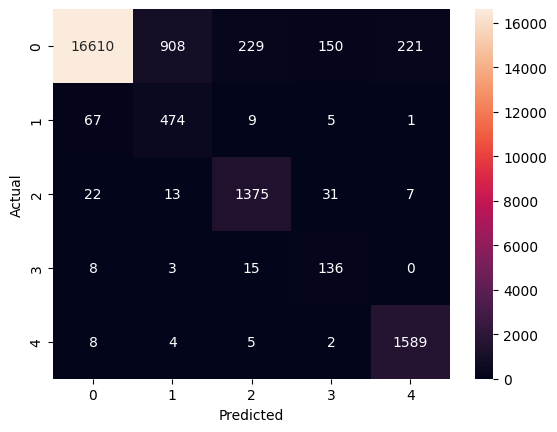

In [19]:
cm = confusion_matrix(
    y_test_cat.argmax(axis=1),
    test_predictions
)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

acc_scores = []
mcc_scores = []
fold = 1

for train_idx, val_idx in kfold.split(X_res):
    print(f"\n🔁 Fold {fold}")

    X_tr, X_va = X_res.iloc[train_idx], X_res.iloc[val_idx]
    y_tr, y_va = y_res_cat[train_idx], y_res_cat[val_idx]

    model = ann_model()
    model.fit(X_tr, y_tr, epochs=10, batch_size=64, verbose=0)

    val_pred = model.predict(X_va).argmax(axis=1)

    acc = np.mean(val_pred == y_va.argmax(axis=1))
    mcc = matthews_corrcoef(y_va.argmax(axis=1), val_pred)

    acc_scores.append(acc)
    mcc_scores.append(mcc)

    print(f"Accuracy: {acc:.4f}")
    print(f"MCC: {mcc:.4f}")

    fold += 1

print("\n✅ Cross-Validation Results")
print("Accuracy per fold:", acc_scores)
print("Mean Accuracy:", np.mean(acc_scores))
print("MCC per fold:", mcc_scores)
print("Mean MCC:", np.mean(mcc_scores))



🔁 Fold 1
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy: 0.9854
MCC: 0.9818

🔁 Fold 2
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.9838
MCC: 0.9797

🔁 Fold 3
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.9837
MCC: 0.9797

🔁 Fold 4
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Accuracy: 0.9841
MCC: 0.9801

✅ Cross-Validation Results
Accuracy per fold: [np.float64(0.9854397333009527), np.float64(0.9837618253871883), np.float64(0.9837066310479198), np.float64(0.9840596988563607)]
Mean Accuracy: 0.9842419721481054
MCC per fold: [0.9818061341222953, 0.9797129619655339, 0.9796832738747233, 0.9800844003173328]
Mean MCC: 0.9803216925699714
